In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
import arabic_reshaper
import re

In [35]:
df = pd.read_csv('C:\\Users\\amitf\\Desktop\\amit\\Self practice\\data for analysis\\Coffe\\Coffee_Chain_Sales.csv')
df = df.copy()
df

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
0,303,51,-35,10/1/2012,503,71,Major Market,Central,46,Leaves,...,Lemon,-5,122,Colorado,30,60,30,90,76,Decaf
1,970,52,-24,10/1/2012,405,71,Major Market,Central,17,Leaves,...,Mint,26,123,Colorado,30,60,50,90,45,Decaf
2,409,43,-22,10/2/2012,419,64,Major Market,South,13,Leaves,...,Lemon,28,107,Texas,30,60,50,90,36,Decaf
3,850,38,-15,10/3/2012,871,56,Major Market,East,10,Leaves,...,Darjeeling,35,94,Florida,40,60,50,100,21,Regular
4,562,72,6,10/4/2012,650,110,Major Market,West,23,Leaves,...,Green Tea,56,182,California,20,60,50,80,54,Regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,8/23/2015,1820,251,Small Market,West,70,Leaves,...,Earl Grey,233,534,Nevada,180,180,100,360,94,Regular
1058,971,88,48,8/24/2015,817,133,Small Market,West,29,Leaves,...,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1059,775,294,-285,8/25/2015,8252,-294,Small Market,West,111,Leaves,...,Green Tea,-605,33,Nevada,210,-210,-320,0,145,Regular
1060,503,134,80,8/26/2015,690,186,Small Market,West,41,Leaves,...,Green Tea,180,341,Oregon,90,140,100,230,65,Regular


In [3]:
df.shape

(1062, 21)

In [4]:
df.columns

Index(['Area Code', 'Cogs', 'DifferenceBetweenActualandTargetProfit', 'Date',
       'Inventory Margin', 'Margin', 'Market_size', 'Market', 'Marketing',
       'Product_line', 'Product_type', 'Product', 'Profit', 'Sales', 'State',
       'Target_cogs', 'Target_margin', 'Target_profit', 'Target_sales ',
       'Total_expenses', 'Type'],
      dtype='object')

In [5]:
df.dtypes

Area Code                                  int64
Cogs                                       int64
DifferenceBetweenActualandTargetProfit     int64
Date                                      object
Inventory Margin                           int64
Margin                                     int64
Market_size                               object
Market                                    object
Marketing                                  int64
Product_line                              object
Product_type                              object
Product                                   object
Profit                                     int64
Sales                                      int64
State                                     object
Target_cogs                                int64
Target_margin                              int64
Target_profit                              int64
Target_sales                               int64
Total_expenses                             int64
Type                

In [6]:
df.isnull().sum().sort_values()

Area Code                                 0
Target_sales                              0
Target_profit                             0
Target_margin                             0
Target_cogs                               0
State                                     0
Sales                                     0
Profit                                    0
Product                                   0
Total_expenses                            0
Product_type                              0
Marketing                                 0
Market                                    0
Market_size                               0
Margin                                    0
Inventory Margin                          0
Date                                      0
DifferenceBetweenActualandTargetProfit    0
Cogs                                      0
Product_line                              0
Type                                      0
dtype: int64

# **EDA PROJECT**
<ul>
<li>outliers</li>
<li>EDA</li>
</ul>

---
### function in use

In [16]:
def plot_correlation_heatmap(df, columns,method):
    correlation_data = df[columns].dropna()
    correlation_matrix = correlation_data.corr(method=method)
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap ({method.capitalize()} Method)')
    plt.show()
    
def plot_pie_chart(df, column_name):
    counts = df[column_name].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(counts))))
    plt.title(f'Distribution of {column_name.capitalize()}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

def plot_violin(df, x_col, y_col):
    plt.figure(figsize=(15, 10))
    sns.violinplot(x=x_col, y=y_col, data=df)
    plt.title(f'Violin Plot of {y_col} by {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

def plot_regplot(df, x_col, y_col):
    filtered_data = df.dropna(subset=[x_col, y_col])
    plt.figure(figsize=(10, 6))
    sns.regplot(data=filtered_data, x=x_col, y=y_col)
    plt.title(f'Relationship between {y_col} by {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()
    
def plot_by_category(df, category_column, target_column):
    survival_data = df.groupby(category_column)[target_column].value_counts(normalize=True).unstack() * 100
    survival_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])
    plt.title(f'{target_column} Percentages by {category_column}')
    plt.xlabel(category_column.capitalize())
    plt.ylabel('Percentage')
    plt.legend(title=target_column.capitalize(), labels=['0', '1'])
    plt.xticks(rotation=0)
    plt.show()
    
def plot_numeric_vs_categorical(data, numeric_column, categorical_column):
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=categorical_column, y=numeric_column, data=data)
    plt.title(f'Boxplot of {numeric_column} by {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel(numeric_column)
    plt.xticks(rotation=45) 
    plt.show()
    
def plot_histogram_with_kde(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=column_name, bins=30, kde=True)
    plt.title(f'Distribution of {column_name.capitalize()}')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Frequency')
    plt.show()
    
def plot_numeric_columns(data, numeric_columns):
    num_columns = len(numeric_columns)
    num_rows = num_columns
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))
    for idx, column in enumerate(numeric_columns):
        row = idx
        sns.violinplot(y=data[column], ax=axes[row, 0])
        axes[row, 0].set_title(f'Violin plot of {column}')
        sns.boxplot(y=data[column], ax=axes[row, 1])
        axes[row, 1].set_title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

def plot_numeric_by_category(data, numeric_column, category_column):
    categories = data[category_column].unique()
    
    for category in categories:
        category_data = data[data[category_column] == category]
        
        plt.figure(figsize=(8, 6))
        sns.countplot(data=category_data, x=numeric_column)
        plt.title(f'Count of {numeric_column} for {category} in {category_column}')
        plt.xlabel(numeric_column)
        plt.ylabel('Count')
        plt.show()

    
def get_numeric_columns(data):
    numeric_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()
    return numeric_columns

def plot_values_by_time(df, column_name):
    df1 = df.copy()
    df1.set_index('Date', inplace=True)
    plt.figure(figsize=(10, 6))
    df1[column_name].plot()
    plt.title(f'{column_name} Over Time')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.xticks(rotation=45)
    plt.show()

def plot_category_counts_by_month(df, categorical_column):
    df1 = df.copy()
    df1.set_index('Date', inplace=True)

    # Group by the categorical column and resample by month, counting the occurrences
    monthly_counts = df1.groupby([categorical_column, pd.Grouper(freq='M')]).size().unstack(level=0)
    # Plot the data
    monthly_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
    plt.title(f'Count of {categorical_column} Over Time')
    plt.xlabel('Month')
    plt.ylabel(f'Count of {categorical_column}')
    plt.xticks(rotation=45)
    plt.legend(title=categorical_column)
    plt.show()

---
## <blockquote> 'Date' </blockquote>
#### time column

### הצגה של עמודה מספרית לפי זמן

In [36]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

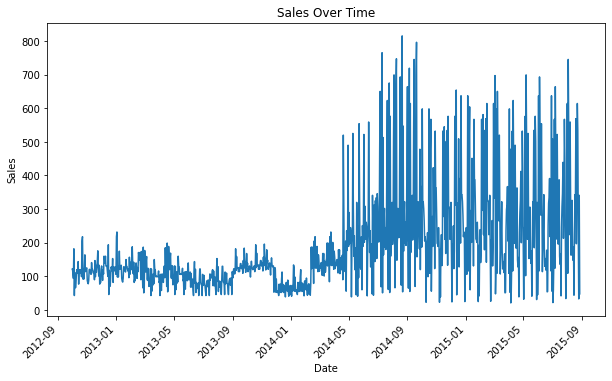

In [11]:
plot_values_by_time(df, 'Sales')

In [41]:
df_up_to_2014 = df[df['Date']> '2014-05-01']
df_up_to_2014

,Area Code,Cogs,DifferenceBetweenActualandTargetProfit,Date,Inventory Margin,Margin,Market_size,Market,Marketing,Product_line,...,Product,Profit,Sales,State,Target_cogs,Target_margin,Target_profit,Target_sales,Total_expenses,Type
579,409,118,27,2014-05-02,930,172,Major Market,South,33,Beans,...,Caffe Mocha,127,290,Texas,90,130,100,220,45,Regular
580,918,78,22,2014-05-03,798,119,Small Market,South,25,Beans,...,Decaf Espresso,62,197,Oklahoma,60,90,40,150,57,Decaf
581,918,88,-19,2014-05-04,561,112,Small Market,South,29,Beans,...,Colombian,71,200,Oklahoma,100,130,90,230,41,Regular
582,918,102,29,2014-05-05,-2003,143,Small Market,South,31,Beans,...,Caffe Latte,89,245,Oklahoma,80,100,60,180,54,Regular
583,337,101,5,2014-05-06,552,130,Small Market,South,33,Leaves,...,Chamomile,85,231,Louisiana,90,120,80,210,45,Decaf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,775,250,133,2015-08-23,1820,251,Small Market,West,70,Leaves,...,Earl Grey,233,534,Nevada,180,180,100,360,94,Regular
1058,971,88,48,2015-08-24,817,133,Small Market,West,29,Leaves,...,Earl Grey,108,236,Oregon,60,100,60,160,60,Regular
1059,775,294,-285,2015-08-25,8252,-294,Small Market,West,111,Leaves,...,Green Tea,-605,33,Nevada,210,-210,-320,0,145,Regular
1060,503,134,80,2015-08-26,690,186,Small Market,West,41,Leaves,...,Green Tea,180,341,Oregon,90,140,100,230,65,Regular


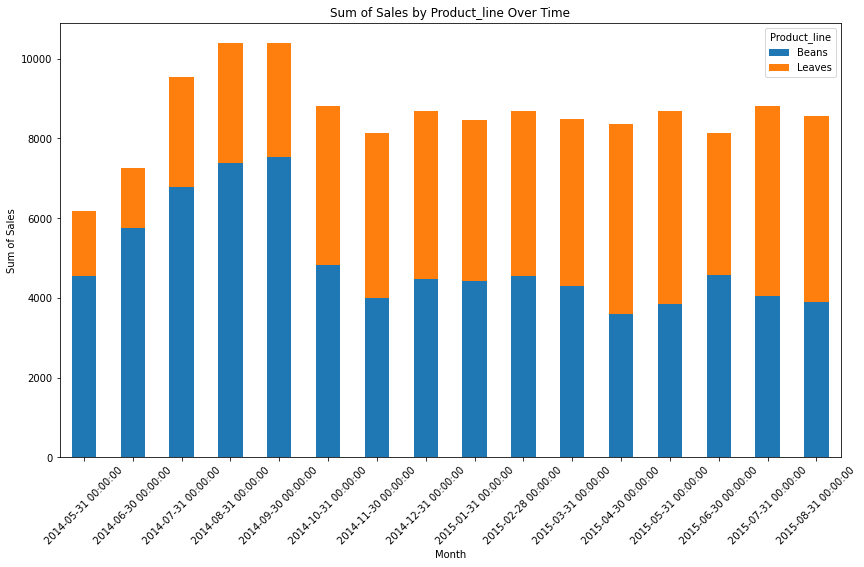

In [43]:
plot_category_sum_by_month(df_up_to_2014,'Product_line')

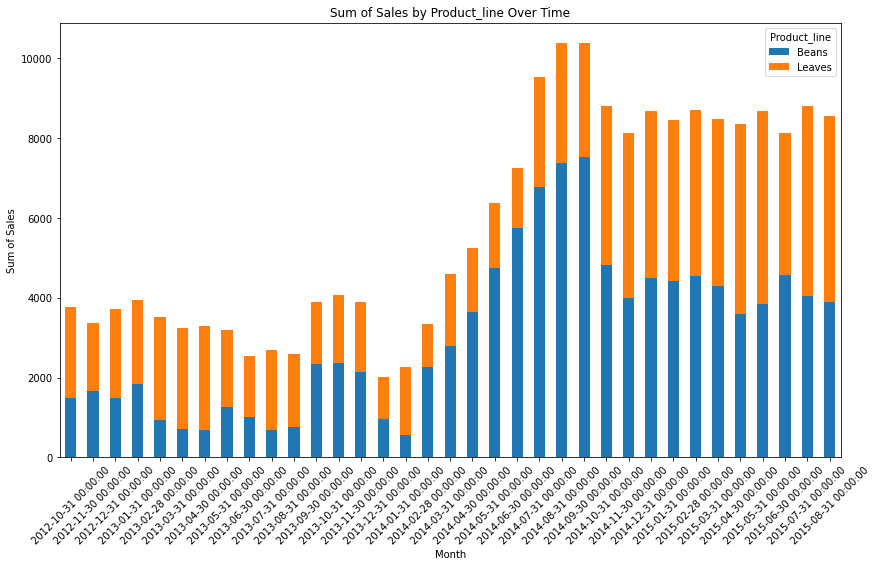

In [44]:
plot_category_sum_by_month(df,'Product_line')

---
## <blockquote>  numeric columns </blockquote>


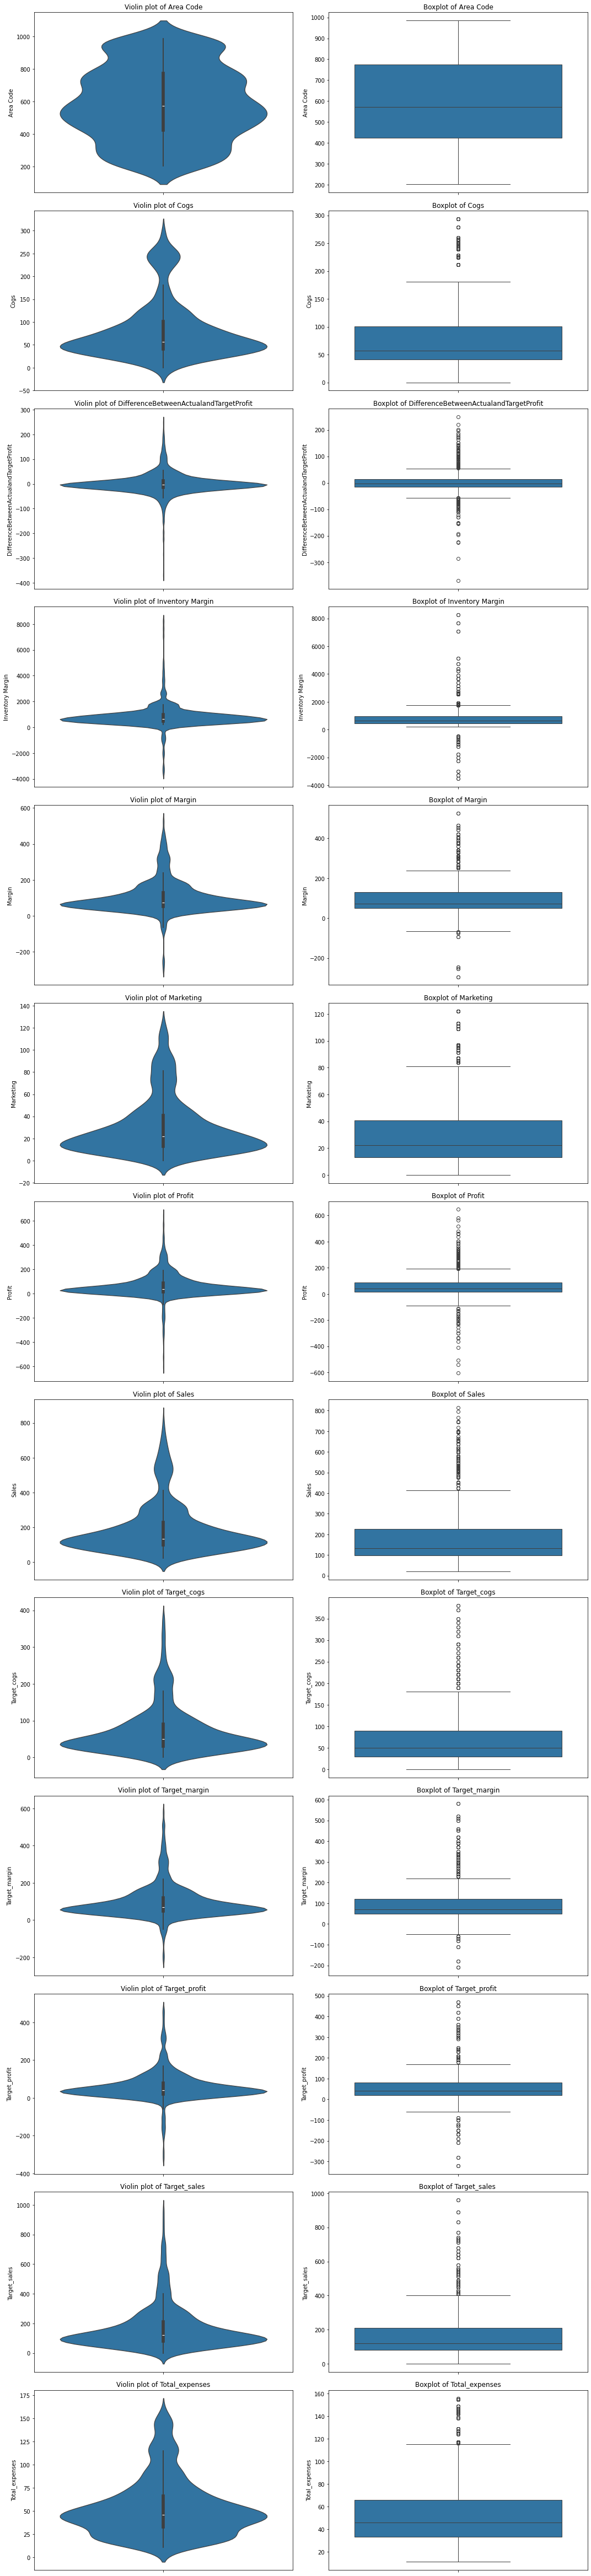

In [25]:
numeric_columns = get_numeric_columns(df)
plot_numeric_columns(df, numeric_columns)

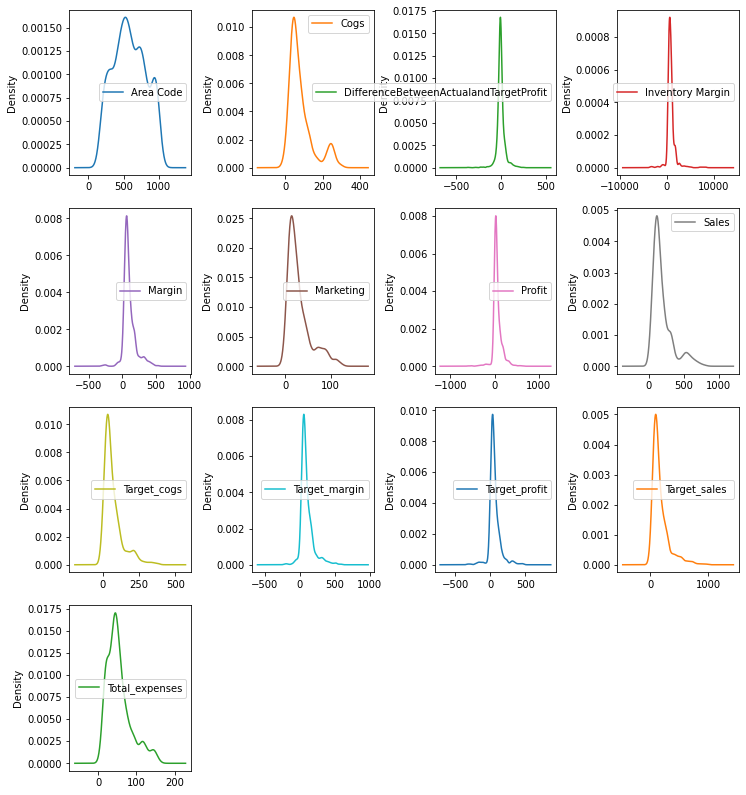

In [26]:
features = numeric_columns

df[features].plot.density(subplots=True, sharex=False, sharey=False, layout=(4, 4), figsize=(12,14))
plt.subplots_adjust(wspace = 0.5);
plt.legend("upper right")
plt.show()

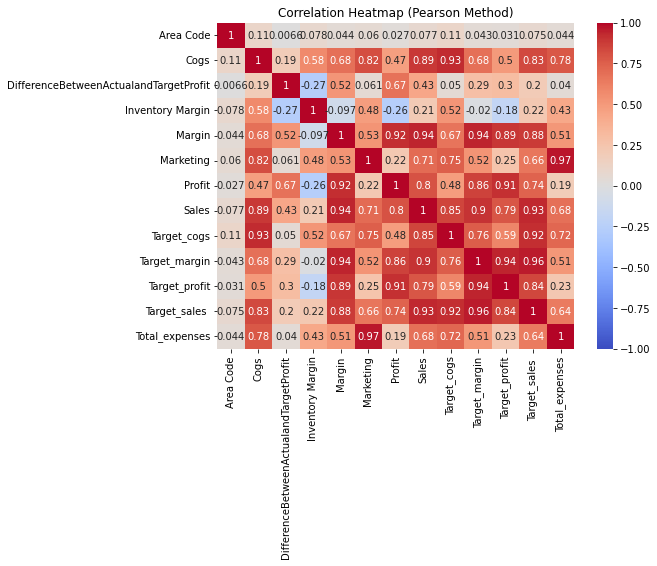

In [27]:
plot_correlation_heatmap(df, features,"pearson")

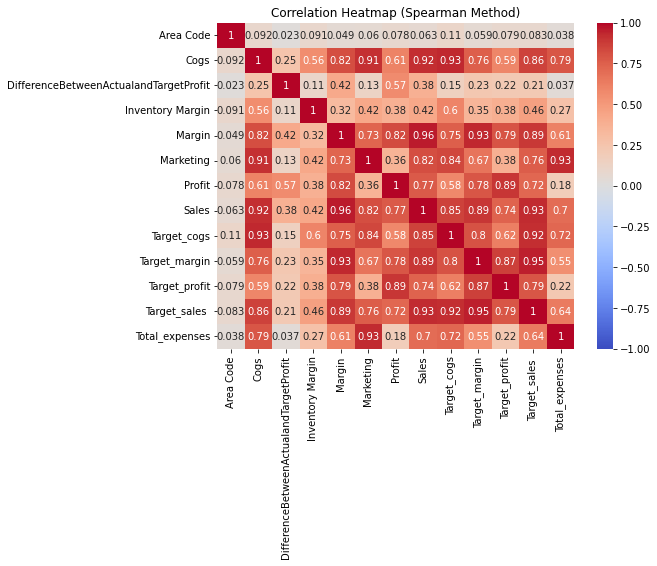

In [28]:
plot_correlation_heatmap(df, features,"spearman")

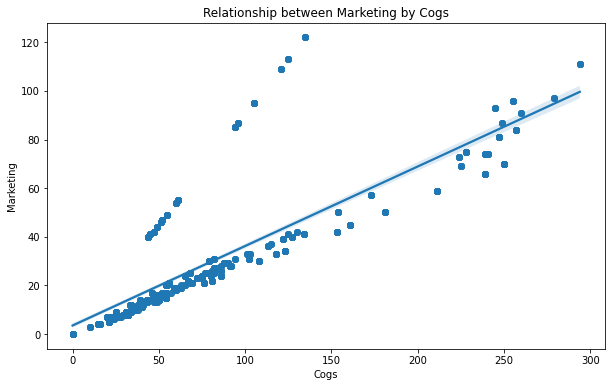

In [29]:
plot_regplot(df, 'Cogs', 'Marketing')

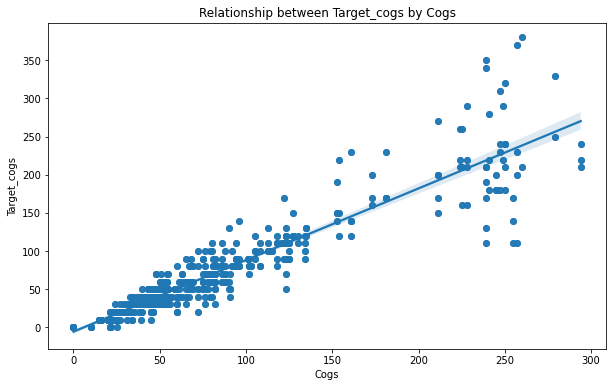

In [31]:
plot_regplot(df, 'Cogs', 'Target_cogs')

---
## <blockquote> 'Cogs' </blockquote>


In [21]:
### COGS (Cost of Goods Sold): The total cost incurred by the coffee chain in producing or purchasing the products it sells.

In [18]:
df['Cogs'].isnull().sum()

0

In [19]:
df['Cogs'].unique()

array([ 51,  52,  43,  38,  72,   0,  47,  27,  31,  40,  49,  45,  60,
        34,  54,  48,  82,  91,  50,  75,  46,  55,  57,  36,  33,  44,
        53,  61,  65,  80,  41,  39,  92,  68,  63,  76,  22,  23,  79,
        28,  32,  69,  86,  24,  35,  29,  30,  56,  59,  67,  21,  25,
        15,  16,  20, 239, 123,  90, 103,  96, 225, 118,  78,  88, 102,
       101,  94, 241,  81, 134, 105, 125, 130, 115, 260, 161, 255, 108,
        77, 249, 121, 181, 211, 245,  83, 279, 135, 153, 250, 294, 122,
       154, 257,  10, 113, 173, 228, 127, 224, 247], dtype=int64)

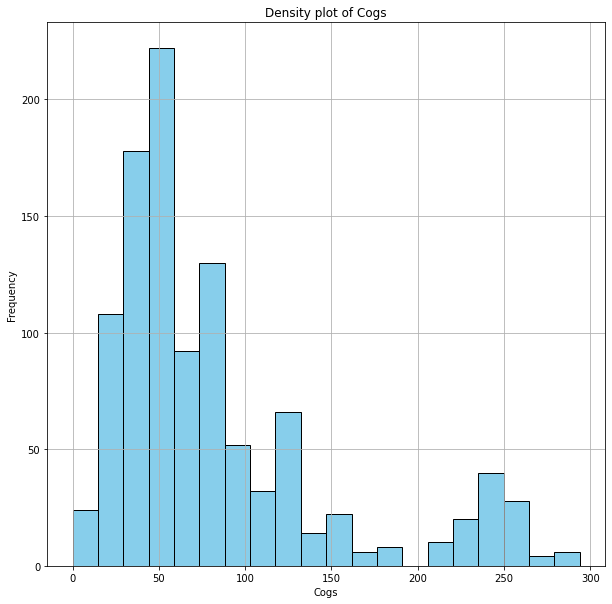

In [20]:
plt.figure(figsize=(10, 10))
plt.hist(df['Cogs'], bins=20, color='skyblue', edgecolor='black')
plt.title('Density plot of Cogs')
plt.xlabel('Cogs')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()